In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

      Q1  Q2  Q3  Q4  Q5ai  Q5aii  Q5aiii  Q5aiv  Q5av  Q5avi  ...  numhhd  \
0      1  -1   1   8     0      0       0      1     0      0  ...       3   
1      3  -1   1   4     0      0       0      0     0      0  ...       3   
2     10   3   2   6     0      0       0      0     0      0  ...       2   
3      9  -1  10  10     0      0       0      0     0      0  ...       1   
4     10   2   6   1     0      0       0      1     0      0  ...       1   
...   ..  ..  ..  ..   ...    ...     ...    ...   ...    ...  ...     ...   
1281   2  -1   3   6     0      0       0      0     0      0  ...       2   
1282  10  10   2  10     0      0       0      0     0      0  ...       1   
1283   9  -1   8   9     0      0       0      0     0      0  ...       4   
1284  11  11   1   2     0      0       0      1     1      0  ...       2   
1285  10   6   6   6     0      0       0      0     0      0  ...       2   

      numkid  numkid2  numkid31  numkid32  numkid33  numkid34  

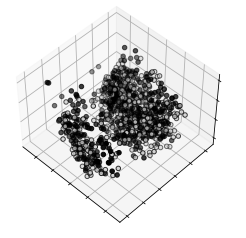

In [54]:
df=pd.read_csv('Downloads/SN7577 (1).tab',sep='\t')
np.random.seed(5)
print(df)

X = df.drop('sex',axis=1).to_numpy()
y = df['sex'].to_numpy()


fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)


for name, label in []:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )

y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

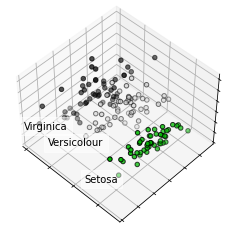

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [53]:
df.sex

0       2
1       1
2       2
3       2
4       1
       ..
1281    1
1282    2
1283    1
1284    1
1285    1
Name: sex, Length: 1286, dtype: int64

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [56]:
df=pd.read_csv('Downloads/SN7577 (1).tab',sep='\t')
df
X = df.drop('sex',axis=1).to_numpy()
y = df['sex'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [57]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  
while len(stack) > 0:

    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    is_split_node = children_left[node_id] != children_right[node_id]

    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )


The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 184] <= 1.5 else to node 2.
	node=1 is a split node: go to node 3 if X[:, 190] <= 2.5 else to node 4.
	node=2 is a leaf node.
		node=3 is a leaf node.
		node=4 is a leaf node.


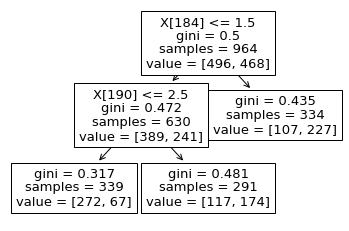

In [58]:
tree.plot_tree(clf)
plt.show()

In [59]:
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)

sample_id = 0

node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:

    if leaf_id[sample_id] == node_id:
        continue

    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )


Rules used to predict sample 0:

decision node 0 : (X_test[0, 184] = 1.0) <= 1.5)
decision node 1 : (X_test[0, 190] = 4.0) > 2.5)
